In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

<h3>TASK 1.1</h3>

1.Load x values.npy and y values.npy<br>
2.Visualise the data with a scatter plot<br>
3.Create a LinearRegression object and predict the Y values for loaded test_x_values.npy

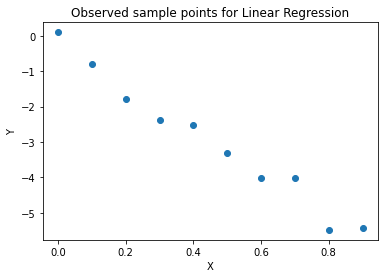

Predicted responses: 
[[-0.2572853 ]
 [-0.31804155]
 [-0.3787978 ]
 [-0.43955405]
 [-0.50031031]
 [-0.56106656]
 [-0.62182281]
 [-0.68257906]
 [-0.74333531]
 [-0.80409156]
 [-0.86484782]
 [-0.92560407]
 [-0.98636032]
 [-1.04711657]
 [-1.10787282]
 [-1.16862907]
 [-1.22938532]
 [-1.29014158]
 [-1.35089783]
 [-1.41165408]
 [-1.47241033]
 [-1.53316658]
 [-1.59392283]
 [-1.65467909]
 [-1.71543534]
 [-1.77619159]
 [-1.83694784]
 [-1.89770409]
 [-1.95846034]
 [-2.01921659]
 [-2.07997285]
 [-2.1407291 ]
 [-2.20148535]
 [-2.2622416 ]
 [-2.32299785]
 [-2.3837541 ]
 [-2.44451035]
 [-2.50526661]
 [-2.56602286]
 [-2.62677911]
 [-2.68753536]
 [-2.74829161]
 [-2.80904786]
 [-2.86980412]
 [-2.93056037]
 [-2.99131662]
 [-3.05207287]
 [-3.11282912]
 [-3.17358537]
 [-3.23434162]
 [-3.29509788]
 [-3.35585413]
 [-3.41661038]
 [-3.47736663]
 [-3.53812288]
 [-3.59887913]
 [-3.65963539]
 [-3.72039164]
 [-3.78114789]
 [-3.84190414]
 [-3.90266039]
 [-3.96341664]
 [-4.02417289]
 [-4.08492915]
 [-4.1456854 ]
 [-

In [7]:
y = np.load("y_values.npy")
x = np.load("x_values.npy")

plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Observed sample points for Linear Regression")
plt.show(block=False)

model = LinearRegression()
model.fit(x,y)
testX = np.load("test_x_values.npy")
predictedY = model.predict(testX)
print("Predicted responses: ", predictedY, sep="\n")


<br>
Plot the X na Y values with test_x_values and predictions to it


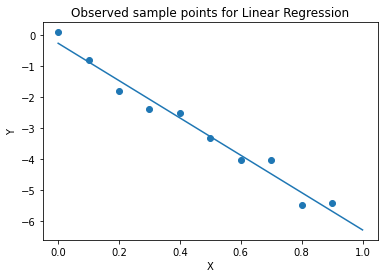

In [8]:
plt.scatter(x, y)
plt.plot(testX, predictedY)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Observed sample points for Linear Regression")
plt.show(block=False)

<br>
Predict and print the y value for a value of x=0.48


In [9]:
oneNumber = np.array([0.48]).reshape((-1,1))
predictedOneNumber = model.predict(oneNumber)
print("Predicted value of 0.48 is: ",predictedOneNumber)

Predicted value of 0.48 is:  [[-3.14442237]]


<br>
<h3>TASK 3.2</h3>
<br>


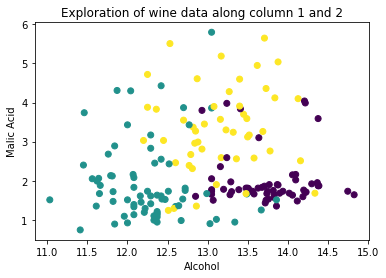

In [29]:
wineData = np.load("wineData.npy")
wineLabel = np.load("wineLabels.npy")

plt.scatter(wineData[:, 0], wineData[:, 1], c=wineLabel)
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.title("Exploration of wine data along column 1 and 2")
plt.show()

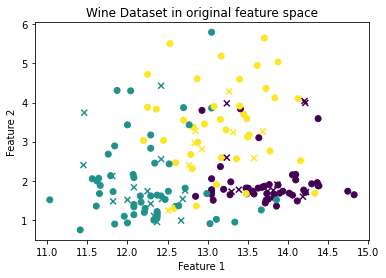

In [28]:
# Select data points to divide into a training and testing set
n = wineData.shape[0]
splitPoint = int(n * 0.8)

# Divide the dataset into the two sets
trainData = wineData[:splitPoint, :] 
trainLabels = wineLabel[:splitPoint] 
testData = wineData[splitPoint:, :] 
testLabels = wineLabel[splitPoint:] 

# Plot the training samples, then plot the testing samples over the top with different marker shapes
plt.scatter(trainData[:, 0], trainData[:, 1], marker='o', c=trainLabels)
plt.scatter(testData[:, 0], testData[:, 1], marker='x', c=testLabels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Wine Dataset in original feature space")
plt.show()

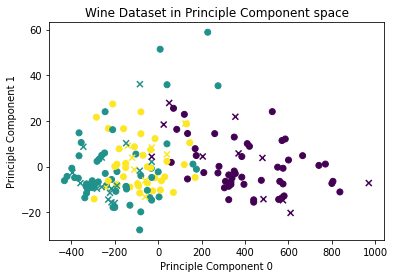

In [27]:
pca = PCA(n_components = 2)
pca.fit(trainData)
pca.fit(testData)
trasformedTrainData = pca.transform(trainData)
trasformedTestData = pca.transform(testData)
#principalComponents = pca.fit_transform(trainData)
plt.scatter(trasformedTrainData[:, 0],trasformedTrainData[:, 1], marker ='o', c=trainLabels)
plt.scatter(trasformedTestData[:, 0], trasformedTestData[:, 1], marker='x', c=testLabels)
plt.xlabel("Principle Component 0")
plt.ylabel("Principle Component 1")
plt.title("Wine Dataset in Principle Component space")
plt.show()


<br>
<h3>TASK 3.3</h3>
<br>


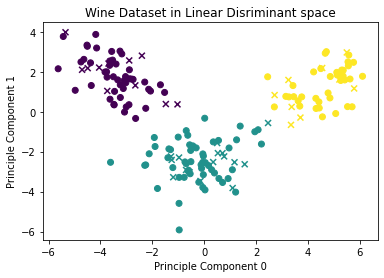

In [26]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(trainData, trainLabels)
ldaTrainData = lda.transform(trainData)
ldaTestData = lda.transform(testData)

plt.scatter(ldaTrainData[:, 0],ldaTrainData[:, 1], marker ='o', c=trainLabels)
plt.scatter(ldaTestData[:, 0], ldaTestData[:, 1], marker='x', c=testLabels)
plt.xlabel("Principle Component 0")
plt.ylabel("Principle Component 1")
plt.title("Wine Dataset in Linear Disriminant space")
plt.show()


<h3> TASK 3.4 </h3>

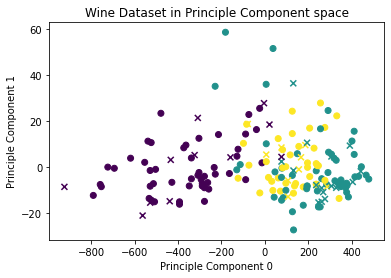

In [37]:

#trainData = wineData[:splitPoint, :] 
#trainLabels = wineLabel[:splitPoint] 
#testData = wineData[splitPoint:, :] 
#testLabels = wineLabel[splitPoint:]

meanTrain = np.mean(trainData)
centeredTrainData = trainData - mean
U, S, V = np.linalg.svd(centeredTrainData)
projectionMatrix = V[0:4]
projectedTrainData = centeredTrainData @ np.transpose(projectionMatrix)
#projectedTrainData = centeredTrainData * V

centeredTestData = testData - mean
projectionMatrix = V[0:4]
projectedTestData = centeredTestData @ np.transpose(projectionMatrix)
#projectedTestData = centeredTestData * V

plt.scatter(projectedTrainData[:, 0], projectedTrainData[:, 1], marker ='o', c=trainLabels)
plt.scatter(projectedTestData[:, 0], projectedTestData[:, 1], marker='x', c=testLabels)
plt.xlabel("Principle Component 0")
plt.ylabel("Principle Component 1")
plt.title("Wine Dataset in Principle Component space")
plt.show()